In [1]:
import numpy as np
import pandas as pd
import cv2
#matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import joblib


In [2]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob(r"D:\TaiLieuHocTap\Nam 4\Machine-Learning\Project\Fruit360\Fruit360\fruits-360\Training\*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

id_to_label_dict
label_ids = np.array([label_to_id_dict[x] for x in labels])


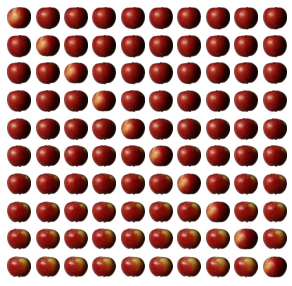

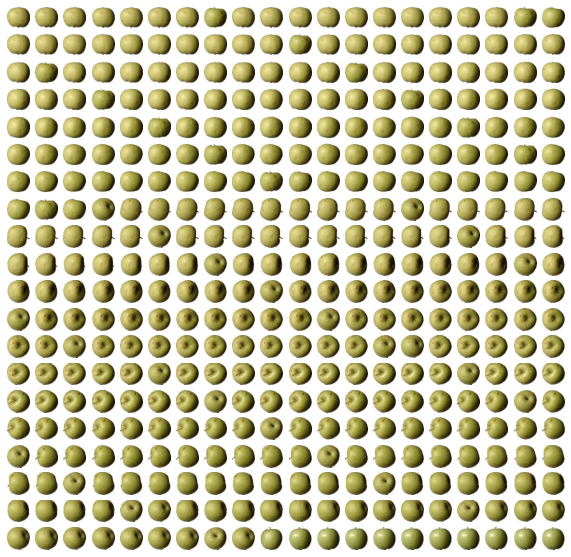

In [4]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(5, 5)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            # axs[i, j].xaxis.set_ticklabels([])
            # axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1   
    
    plt.show()
plot_image_grid(fruit_images[0:100], 10, 10)
plot_image_grid(fruit_images[2000:2400], 20, 20, figsize=(10,10))

In [3]:
#Visualize the data with PCA and t-SNE
scaler = StandardScaler()

images_scaled = scaler.fit_transform([i.flatten() for i in fruit_images])

pca = PCA(n_components=50)
joblib.dump(pca, 'saved_var/pca')
pca_result = pca.fit_transform(images_scaled)

# tsne = TSNE(n_components=2, perplexity=40.0)
# tsne_result = tsne.fit_transform(pca_result)
# tsne_result_scaled = StandardScaler().fit_transform(tsne_result)
# joblib.dump(tsne_result_scaled,r'D:\TaiLieuHocTap\Nam 4\Machine-Learning\Project\Fruit360\Fruit360\saved_var\tsne_result_scaled')

['saved_var/pca']

In [6]:
pca_result = pca.fit_transform(images_scaled)

In [7]:
joblib.dump(pca_result, 'saved_var/pca_result')

['saved_var/pca_result']

In [9]:
pca_result = joblib.load('saved_var/pca_result')
tsne_result_scaled = joblib.load('saved_var/tsne_result_scaled')
print('done')

done


In [4]:
def visualize_scatter(data_2d, label_ids, id_to_label_dict=None, figsize=(20,20)):
    if not id_to_label_dict:
        id_to_label_dict = {v:i for i,v in enumerate(np.unique(label_ids))}
    
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    cmap = plt.cm.get_cmap("jet", nb_classes)
    
    for i, label_id in enumerate(np.unique(label_ids)):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    c= cmap(i),
                    linewidth='5',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    #plt.legend(loc='best')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),
          fancybox=True, shadow=True, ncol=1, fontsize=figsize[0])


def visualize_scatter_with_images(data_2d, images, figsize=(45,45), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid()
    artists = []
    for xy, i in zip(data_2d, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(data_2d)
    ax.autoscale()
    plt.show()


In [13]:
#visualize_scatter(tsne_result_scaled, label_ids, id_to_label_dict, figsize=(25, 25))

#visualize_scatter_with_images(tsne_result_scaled, fruit_images, image_zoom=0.4, figsize=(25, 25))

X_train, X_test, y_train, y_test = train_test_split(pca_result, label_ids, test_size=0.25, random_state=42)
#Train Random Forest Classifier
forest = RandomForestClassifier(n_estimators=10)
forest = forest.fit(X_train, y_train)
joblib.dump(forest, 'saved_var/rf_clf')

# test_predictions = forest.predict([X_train[1]])

In [54]:
forest = joblib.load('saved_var/rf_clf')

['saved_var/rf_clf']

In [79]:
fruit_images_test = []
labels_test = [] 
y_test_ = np.array([])
id = 0
for fruit_dir_path_test in glob.glob('fruits-360/Test/*'):
    fruit_label_test = fruit_dir_path_test.split("/")[-1]

    for image_path_test in glob.glob(os.path.join(fruit_dir_path_test, "*.jpg")):
        image_test = cv2.imread(image_path_test, cv2.IMREAD_COLOR)
        
        image_test = cv2.resize(image_test, (45, 45))
        image_test = cv2.cvtColor(image_test, cv2.COLOR_RGB2BGR)
        
        fruit_images_test.append(image_test)
        labels_test.append(fruit_label_test)

        y_test_ = np.append(y_test_, [id]) 
    id = id + 1
fruit_images_test = np.array(fruit_images_test)
labels_test = np.array(labels_test)

label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels_test))}
id_to_label_dict_test = {v: k for k, v in label_to_id_dict.items()}


#label_ids_test = np.array([id_to_label_dict[x] for x in labels_test])

In [82]:
y_test_[10000:10050]

array([59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.,
       59., 59., 59., 59., 59., 59., 59., 59., 59., 59., 59.])

In [96]:
images_scaled_test.shape

(22688, 6075)

In [95]:
#Visualize the data with PCA and t-SNE
scaler = StandardScaler()

images_scaled_test = scaler.fit_transform(images_scaled_test.astype(np.float64))

pca = PCA(n_components=50)
pca_result_test = pca.transform(images_scaled_test)
joblib.dump(pca_result_test, 'saved_var/pca_result_test')

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [91]:
test_predictions = forest.predict(pca_result_test)

In [94]:
precision = accuracy_score(test_predictions, y_test_)
print("Test Accuracy with Random Forest: {0:.6f}".format(precision))

Test Accuracy with Random Forest: 0.206365


In [ ]:
X_test, y_test = test_split(pca_result, label_ids_test, test_size=0.25, random_state=42)

In [18]:
print(forest.predict(X_test[:20]))
print(y_test[:20])

[ 43 130  94 118   6 115  50  14  58 128  91 111  17 118  36  43 111  80
  34  44]
[ 43 130  94 118   6 115  50  14  58 128  91 111  17 118  36  43 111  80
  34  44]


In [20]:
from sklearn.model_selection import cross_val_score
if 0:
    rf_acc = cross_val_score(forest, X_train, y_train, cv=5, n_jobs=-1, scoring="accuracy")
    joblib.dump(rf_acc,r'D:\TaiLieuHocTap\Nam 4\Machine-Learning\Project\Fruit360\Fruit360\saved_var\rf_acc')
else:
    rf_acc = joblib.load(r'D:\TaiLieuHocTap\Nam 4\Machine-Learning\Project\Fruit360\Fruit360\saved_var\rf_acc')

rf_acc_test = forest.score(X_test, y_test)


In [21]:
print(rf_acc)
print(rf_acc_test)

[0.99310617 0.9929092  0.99418948 0.9935001  0.99320398]
0.9951545234296519
